In [1]:
# Data Science
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
# Data Science
import pandas as pd
import numpy as np

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [3]:
df = pd.read_csv('hwc.csv')
df

,P_NAME,P_DETECTION,P_DISCOVERY_FACILITY,P_YEAR,P_UPDATE,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_MASS_LIMIT,P_MASS_ORIGIN,...,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
0,OGLE-2016-BLG-1227L b,Microlensing,OGLE,2020,2020-04-02,250.00000,-120.00000,413.00000,0,Mass,...,NaN,0.214133,0,0,NaN,0,NaN,Scorpius,Sco,Scorpion
1,Kepler-276 c,Transit,Kepler,2013,2018-09-25,16.60000,-3.60000,4.40000,0,Mass,...,2.097783,0.316980,0,0,Hot,0,0.272032,Cygnus,Cyg,Swan
2,Kepler-829 b,Transit,Kepler,2016,2019-04-16,5.10000,NaN,NaN,0,M-R relationship,...,1.756317,0.459559,0,0,Hot,0,0.254763,Lyra,Lyr,Lyre
3,K2-283 b,Transit,K2,2018,2019-09-05,12.20000,NaN,NaN,0,M-R relationship,...,0.568374,0.443760,0,0,Hot,0,0.193906,Pisces,Psc,Fishes
4,Kepler-477 b,Transit,Kepler,2016,2019-04-16,4.94000,NaN,NaN,0,M-R relationship,...,0.768502,0.386150,0,0,Hot,0,0.276721,Lyra,Lyr,Lyre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,HD 222155 b,Radial Velocity,Haute-Provence Observatory,2011,2023-06-12,581.62598,-82.63539,111.23994,0,Mass,...,1.893917,0.541322,0,0,Cold,0,0.178593,Andromeda,And,Andromeda
5595,HD 88986 b,Radial Velocity,Haute-Provence Observatory,2023,2023-12-04,17.20000,-3.80000,4.00000,0,Mass,...,2.520276,0.543834,0,0,Hot,0,0.379540,Leo Minor,LMi,Little Lion
5596,Kepler-30 b,Transit,Kepler,2012,2023-11-28,11.30000,-1.40000,1.40000,0,Mass,...,1.249824,0.400198,0,0,Hot,0,0.241771,Lyra,Lyr,Lyre
5597,HD 3167 d,Radial Velocity,Multiple Observatories,2017,2023-04-17,4.33000,-0.45000,0.45000,0,Msini,...,0.787469,0.475336,0,0,Hot,0,0.272975,Pisces,Psc,Fishes


In [ ]:
df = pd.read_csv("hwc.csv")


keep_columns = [
    'P_RADIUS', 'P_MASS', 'P_DENSITY', 'P_GRAVITY', 'P_ESCAPE',
    'P_TEMP_EQUIL', 'P_TEMP_SURF', 'P_FLUX', 'P_FLUX_MIN', 'P_FLUX_MAX',
    'P_HABZONE_CON', 'P_HABZONE_OPT',
    'P_SEMI_MAJOR_AXIS', 'P_PERIOD', 'P_ECCENTRICITY', 'P_INCLINATION',
    'P_HILL_SPHERE', 'P_DISTANCE', 'P_DISTANCE_EFF',
    'S_TEMPERATURE', 'S_RADIUS', 'S_LUMINOSITY', 'P_ESI',
    'S_AGE', 'S_METALLICITY', 'S_TIDAL_LOCK', 'S_ABIO_ZONE', 'S_LOG_LUM',
    'S_MASS', 'S_DISTANCE', 'S_MAG',
    'P_HABITABLE'  # Target
]

df_filtered = df[keep_columns]

In [5]:
df_filtered

,P_RADIUS,P_MASS,P_DENSITY,P_GRAVITY,P_ESCAPE,P_TEMP_EQUIL,P_TEMP_SURF,P_FLUX,P_FLUX_MIN,P_FLUX_MAX,...,P_ESI,S_AGE,S_METALLICITY,S_TIDAL_LOCK,S_ABIO_ZONE,S_LOG_LUM,S_MASS,S_DISTANCE,S_MAG,P_HABITABLE
0,13.90,250.00000,0.093088,1.293929,4.240945,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.214133,NaN,NaN,0.10,NaN,NaN,0
1,2.90,16.60000,0.680635,1.973841,2.392517,541.98483,NaN,20.490365,20.490365,20.490365,...,0.272032,0.40,0.02,0.316980,2.097783,-0.089,1.10,1144.8600,15.48100,0
2,2.11,5.10000,0.542904,1.145527,1.554690,1001.11710,1130.60440,238.528680,238.528680,238.528680,...,0.254763,4.68,0.03,0.459559,1.756317,0.040,0.98,1073.7600,14.97300,0
3,3.52,12.20000,0.279725,0.984633,1.861695,1104.46820,NaN,353.357260,353.357260,353.357260,...,0.193906,NaN,0.28,0.443760,0.568374,-0.524,0.89,402.9150,14.36400,0
4,2.07,4.94000,0.556950,1.152886,1.544822,681.30334,769.42507,51.163853,51.163853,51.163853,...,0.276721,2.09,-0.04,0.386150,0.768502,-0.372,0.87,367.0000,13.83500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,13.40,581.62598,0.241729,3.239173,6.588241,150.37253,NaN,0.123796,0.090815,0.173187,...,0.178593,8.20,-0.18,0.541322,1.893917,0.509,1.21,50.6078,7.11716,0
5595,2.49,17.20000,1.114116,2.774149,2.628237,417.87626,NaN,7.568789,4.778600,12.720870,...,0.379540,7.90,0.06,0.543834,2.520276,0.393,1.25,33.2673,6.46974,0
5596,3.90,11.30000,0.190495,0.742932,1.702186,523.80007,NaN,17.899396,16.470984,19.486057,...,0.241771,2.00,0.18,0.400198,1.249824,-0.237,0.99,914.2210,15.72600,0
5597,1.92,4.33000,0.611764,1.174588,1.501735,788.76035,890.78087,92.918155,73.538519,119.120250,...,0.272975,7.80,0.04,0.475336,0.787469,-0.270,0.84,47.2899,8.97000,0


In [6]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='distance')
df_imputed = pd.DataFrame(imputer.fit_transform(df_filtered), columns=df_filtered.columns)


In [7]:
df_imputed


,P_RADIUS,P_MASS,P_DENSITY,P_GRAVITY,P_ESCAPE,P_TEMP_EQUIL,P_TEMP_SURF,P_FLUX,P_FLUX_MIN,P_FLUX_MAX,...,P_ESI,S_AGE,S_METALLICITY,S_TIDAL_LOCK,S_ABIO_ZONE,S_LOG_LUM,S_MASS,S_DISTANCE,S_MAG,P_HABITABLE
0,13.90,250.00000,0.093088,1.293929,4.240945,3254.061844,7672.594600,303141.536223,303138.216981,303149.359553,...,0.234095,5.010000,-0.0982,0.214133,1.090760e+38,1.9090,0.10,707.2554,13.93300,0.0
1,2.90,16.60000,0.680635,1.973841,2.392517,541.984830,654.998885,20.490365,20.490365,20.490365,...,0.272032,0.400000,0.0200,0.316980,2.097783e+00,-0.0890,1.10,1144.8600,15.48100,0.0
2,2.11,5.10000,0.542904,1.145527,1.554690,1001.117100,1130.604400,238.528680,238.528680,238.528680,...,0.254763,4.680000,0.0300,0.459559,1.756317e+00,0.0400,0.98,1073.7600,14.97300,0.0
3,3.52,12.20000,0.279725,0.984633,1.861695,1104.468200,1237.225688,353.357260,353.357260,353.357260,...,0.193906,5.484193,0.2800,0.443760,5.683741e-01,-0.5240,0.89,402.9150,14.36400,0.0
4,2.07,4.94000,0.556950,1.152886,1.544822,681.303340,769.425070,51.163853,51.163853,51.163853,...,0.276721,2.090000,-0.0400,0.386150,7.685024e-01,-0.3720,0.87,367.0000,13.83500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,13.40,581.62598,0.241729,3.239173,6.588241,150.372530,280.813220,0.123796,0.090815,0.173187,...,0.178593,8.200000,-0.1800,0.541322,1.893917e+00,0.5090,1.21,50.6078,7.11716,0.0
5595,2.49,17.20000,1.114116,2.774149,2.628237,417.876260,564.361780,7.568789,4.778600,12.720870,...,0.379540,7.900000,0.0600,0.543834,2.520276e+00,0.3930,1.25,33.2673,6.46974,0.0
5596,3.90,11.30000,0.190495,0.742932,1.702186,523.800070,609.280787,17.899396,16.470984,19.486057,...,0.241771,2.000000,0.1800,0.400198,1.249824e+00,-0.2370,0.99,914.2210,15.72600,0.0
5597,1.92,4.33000,0.611764,1.174588,1.501735,788.760350,890.780870,92.918155,73.538519,119.120250,...,0.272975,7.800000,0.0400,0.475336,7.874695e-01,-0.2700,0.84,47.2899,8.97000,0.0


In [8]:
X = df_imputed.drop('P_ESI', axis=1)
y = df_imputed['P_ESI']


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
X_scaled

array([[ 1.53371096e+00, -8.21575723e-02, -7.84704109e-02, ...,
        -7.50601755e-04,  4.05956908e-01, -1.07393800e-01],
       [-5.29421907e-01, -1.80693392e-01, -3.46113337e-02, ...,
         3.87427710e-01,  9.10591087e-01, -1.07393800e-01],
       [-6.77592359e-01, -1.85548413e-01, -4.48926589e-02, ...,
         3.24358268e-01,  7.44987623e-01, -1.07393800e-01],
       ...,
       [-3.41864374e-01, -1.82930924e-01, -7.11991825e-02, ...,
         1.82838778e-01,  9.90458900e-01, -1.07393800e-01],
       [-7.13228290e-01, -1.85873489e-01, -3.97523546e-02, ...,
        -5.86174734e-01, -1.21193678e+00, -1.07393800e-01],
       [ 1.45868795e+00,  4.67099834e-02, -6.85730713e-02, ...,
         4.75628610e+00,  6.66293378e-01, -1.07393800e-01]])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(256, input_shape=(X_train.shape[1],)),
    layers.PReLU(),
    layers.Dropout(0.3),

    layers.Dense(128),
    layers.PReLU(),
    layers.Dropout(0.25),

    layers.Dense(64),
    layers.PReLU(),
    layers.Dropout(0.2),

    layers.Dense(32),
    layers.PReLU(),
    layers.Dropout(0.1),

    layers.Dense(1, activation='linear')
])

# Compile with default Adam optimizer
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)


In [31]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
112/112 [==============================] - 4s 21ms/step - loss: 0.0358 - mean_absolute_error: 0.1193 - val_loss: 0.0087 - val_mean_absolute_error: 0.0612
Epoch 2/100
112/112 [==============================] - 2s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0810 - val_loss: 0.0080 - val_mean_absolute_error: 0.0595
Epoch 3/100
112/112 [==============================] - 2s 18ms/step - loss: 0.0103 - mean_absolute_error: 0.0711 - val_loss: 0.0072 - val_mean_absolute_error: 0.0553
Epoch 4/100
112/112 [==============================] - 2s 19ms/step - loss: 0.0084 - mean_absolute_error: 0.0644 - val_loss: 0.0066 - val_mean_absolute_error: 0.0545
Epoch 5/100
112/112 [==============================] - 2s 19ms/step - loss: 0.0078 - mean_absolute_error: 0.0615 - val_loss: 0.0069 - val_mean_absolute_error: 0.0544
Epoch 6/100
112/112 [==============================] - 2s 19ms/step - loss: 0.0064 - mean_absolute_error: 0.0567 - val_loss: 0.0043 - val_mean_absolute_error: 0.0471
Epoc

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on test data
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


35/35 [==============================] - 1s 9ms/step
Mean Absolute Error (MAE): 0.0163
Root Mean Squared Error (RMSE): 0.0293
R² Score: 0.9506


In [ ]:
selected_planets = df_imputed.iloc[[0, 1, 2, 3, 4]]  

actual_esi = selected_planets['P_ESI'].values
features = selected_planets.drop(columns=['P_ESI'])


features_scaled = scaler.transform(features)

predicted_esi = model.predict(features_scaled).flatten()


comparison_df = pd.DataFrame({
    "Planet_Index": selected_planets.index,
    "Actual_ESI": actual_esi,
    "Predicted_ESI": predicted_esi,
    "Absolute_Error": np.abs(actual_esi - predicted_esi)
})

print(comparison_df)

1/1 [==============================] - 0s 259ms/step
   Planet_Index  Actual_ESI  Predicted_ESI  Absolute_Error
0             0    0.234095       0.213154        0.020941
1             1    0.272032       0.270895        0.001137
2             2    0.254763       0.256564        0.001802
3             3    0.193906       0.207358        0.013452
4             4    0.276721       0.280046        0.003325


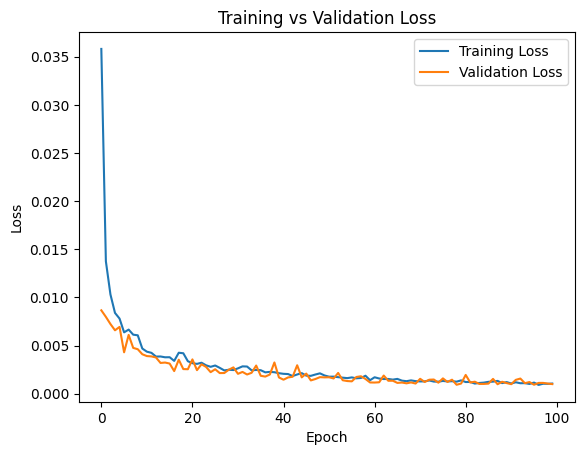

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.show()


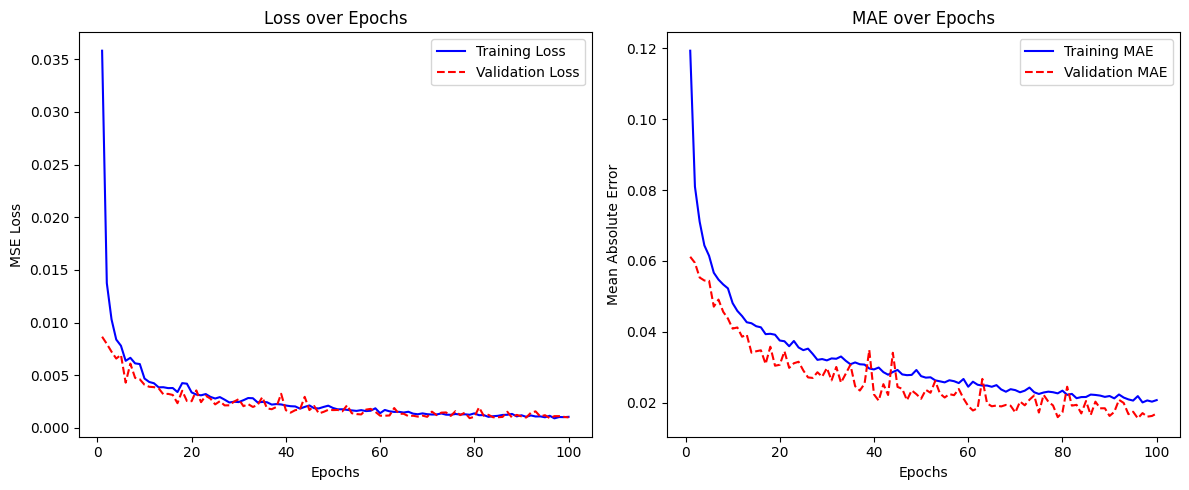

In [ ]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
epochs = range(1, len(loss) + 1)


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, mae, 'b-', label='Training MAE')
plt.plot(epochs, val_mae, 'r--', label='Validation MAE')
plt.title('MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.savefig("esi_model_training_plot.png", dpi=300)
plt.show()
